<a href="https://colab.research.google.com/github/mohzary/ML-Python-IBM-Course/blob/master/regression/lab1_SLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Needed packages

In [0]:

import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import io
from google.colab import files
%matplotlib inline

### Downloading Data


In [5]:
datafile = files.upload()


Saving FuelConsumptionCo2.csv to FuelConsumptionCo2.csv


In [6]:
for fn in datafile.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(datafile[fn])))

data_df = pd.read_csv(io.StringIO(datafile['FuelConsumptionCo2.csv'].decode('utf-8')))

User uploaded file "FuelConsumptionCo2.csv" with length 72629 bytes


## Understanding the Data


In [7]:
data_df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [8]:
data_df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [9]:
data2_df = data_df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
data2_df.head(10)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267
9,2.4,4,9.2,212


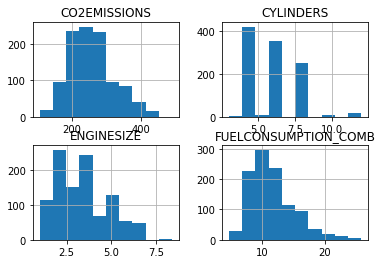

In [11]:
vis = data2_df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
vis.hist()
plt.show()

##Now, lets plot each of these features vs the Emission, to see how linear is their relation:

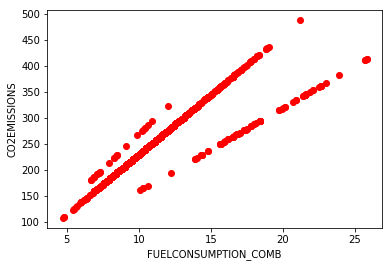

In [12]:
plt.scatter(data2_df.FUELCONSUMPTION_COMB, data2_df.CO2EMISSIONS, color='red')
plt.xlabel('FUELCONSUMPTION_COMB')
plt.ylabel('CO2EMISSIONS')
plt.show()

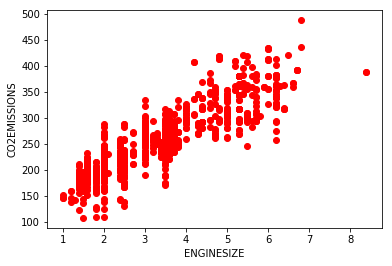

In [13]:
plt.scatter(data2_df.ENGINESIZE, data2_df.CO2EMISSIONS, color='red')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

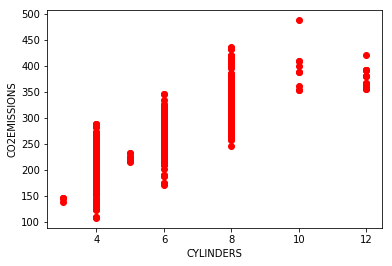

In [14]:
plt.scatter(data2_df.CYLINDERS, data2_df.CO2EMISSIONS, color='red')
plt.xlabel('CYLINDERS')
plt.ylabel('CO2EMISSIONS')
plt.show()

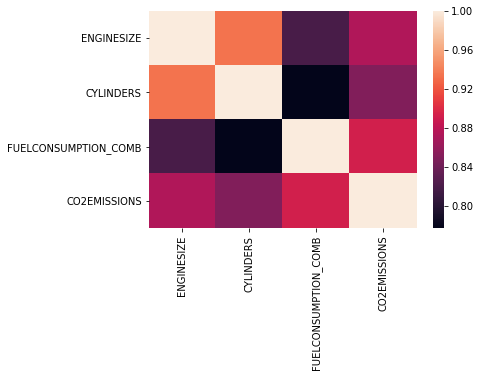

In [15]:
import seaborn as sns
corr = data2_df.corr()
sns.heatmap(corr)

#### Creating train and test dataset


In [0]:
#data2_df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
X = data2_df.drop(['CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS'],axis=1)
Y = data2_df['CO2EMISSIONS']

In [18]:
X.head(10)


,ENGINESIZE
0,2.0
1,2.4
2,1.5
3,3.5
4,3.5
5,3.5
6,3.5
7,3.7
8,3.7
9,2.4


In [19]:
Y.head(10)

0    196
1    221
2    136
3    255
4    244
5    230
6    232
7    255
8    267
9    212
Name: CO2EMISSIONS, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
print(len(X_train))

853


##Modeling

In [28]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)
# The coefficients
coef_v = regr.coef_
intercept_v = regr.intercept_
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)
print ('Coefficients value: ', coef_v)
print ('Intercept value: ',intercept_v)

Coefficients:  [39.24574174]
Intercept:  125.72247202100542
Coefficients value:  [39.24574174]
Intercept value:  125.72247202100542


##Plot the Output

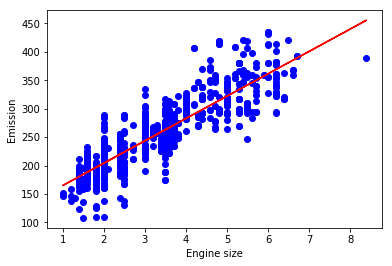

In [30]:
plt.scatter(X_train, Y_train,  color='blue')
plt.plot(X_train, regr.coef_ * X_train + regr.intercept_, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

##Evaluation Metrics
- Mean absolute error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.

- Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean absolute error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.

- R-squared is not error, but is a popular metric for accuracy of your model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).


In [32]:
from sklearn.metrics import r2_score

Y_pred = regr.predict(X_test)
print("Mean absolute error: %.2f" % np.mean(np.absolute(Y_pred - Y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((Y_pred - Y_test) ** 2))
print("R2-score: %.2f" % r2_score(Y_pred, Y_test) )


Mean absolute error: 23.98
Residual sum of squares (MSE): 1016.43
R2-score: 0.72
